In [4]:
import numpy as np
import pandas as pd
import pickle

In [5]:
company = pickle.load( open( "company.pickle", "rb" ) )
action = pickle.load( open( "action.pickle", "rb" ) )
data = pickle.load( open( "data.pickle", "rb" ) )
features_pre = pickle.load( open( "features_first.pickle", "rb" ) )

In [6]:
action_table = pd.DataFrame(data=action['Enterprise Value Multiple'], columns=['actions'], index=company['Enterprise Value Multiple'])
action_table

actions
XOM US Equity           0
XOM US Equity1          1
XOM US Equity2          0
XOM US Equity3          0
XOM US Equity4          1
WMT US Equity1          0
WMT US Equity2          0
WMT US Equity3          0
WMT US Equity4          0
WMT US Equity5          0
WMT US Equity6          1
WMT US Equity7          1
WMT US Equity8          1
WMT US Equity9          1
WMT US Equity10         1
WFC US Equity3          0
WFC US Equity4          0
WFC US Equity5          0
WFC US Equity6          0
WFC US Equity7          1
WFC US Equity8          1
WFC US Equity9          1
WFC US Equity10         1
WFC US Equity11         1
WFC US Equity12         1
WFC US Equity13         1
WFC US Equity14         1
WFC US Equity15         1
WFC US Equity16         1
WFC US Equity17         1
...                   ...
BK US Equity5           1
BK US Equity6           1
BK US Equity7           1
BK US Equity8           1
BK US Equity9           1
BK US Equity10          0
BK US Equity11          0
BK US Equity12          1
BK US Equity13          1
BK US Equity14          1
BK US Equity15          1
BDX US Equity           0
BDX US Equity1          1
BDX US Equity2          1
BDX US Equity3          1
BDX US Equity4          1
ANTM US Equity          0
ANTM US Equity1         0
ANTM US Equity2         0
ANTM US Equity3         0
ADM US Equity           0
ADM US Equity1          1
AAPL US Equity3         1
AAPL US Equity4         1
AAPL US Equity5         1
AAPL US Equity6         1
AAPL US Equity7         1
AAPL US Equity8         1
AAPL US Equity9         1
AAPL US Equity10        1

[284 rows x 1 columns]

In [7]:
ga_target = pd.concat([features_pre, action_table], axis=1)
ga_target

Enterprise Value Multiple  P/E (Diluted, Excl. EI)  \
XOM US Equity                             2                        0   
XOM US Equity1                            3                        1   
XOM US Equity2                            0                        0   
XOM US Equity3                            3                        0   
XOM US Equity4                            1                        0   
WMT US Equity1                            0                        3   
WMT US Equity2                            0                        0   
WMT US Equity3                            0                        2   
WMT US Equity4                            2                        0   
WMT US Equity5                            1                        0   
WMT US Equity6                            1                        1   
WMT US Equity7                            1                        1   
WMT US Equity8                            2                        1   
WMT US Equity9                            2                        1   
WMT US Equity10                           2                        0   
WFC US Equity3                            1                        2   
WFC US Equity4                            1                        2   
WFC US Equity5                            1                        2   
WFC US Equity6                            1                        2   
WFC US Equity7                            0                        1   
WFC US Equity8                            0                        0   
WFC US Equity9                            2                        0   
WFC US Equity10                           2                        3   
WFC US Equity11                           2                        3   
WFC US Equity12                           2                        3   
WFC US Equity13                           2                        3   
WFC US Equity14                           2                        3   
WFC US Equity15                           2                        3   
WFC US Equity16                           3                        3   
WFC US Equity17                           3                        3   
...                                     ...                      ...   
BK US Equity5                             3                        2   
BK US Equity6                             1                        3   
BK US Equity7                             1                        3   
BK US Equity8                             1                        3   
BK US Equity9                             3                        0   
BK US Equity10                            1                        0   
BK US Equity11                            3                        0   
BK US Equity12                            0                        1   
BK US Equity13                            3                        3   
BK US Equity14                            3                        2   
BK US Equity15                            1                        1   
BDX US Equity                             1                        1   
BDX US Equity1                            2                        2   
BDX US Equity2                            0                        2   
BDX US Equity3                            0                        2   
BDX US Equity4                            2                        2   
ANTM US Equity                            3                        1   
ANTM US Equity1                           3                        0   
ANTM US Equity2                           1                        3   
ANTM US Equity3                           0                        1   
ADM US Equity                             1                        3   
ADM US Equity1                            2                        1   
AAPL US Equity3                           0                        2   
AAPL US Equity4                           1               

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X, y = ga_target.loc[:, (ga_target.columns != 'actions')], ga_target['actions']
#X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [6]:
X_train.values

array([[3, 2, 2, ..., 1, 2, 1],
       [2, 2, 2, ..., 1, 1, 3],
       [3, 1, 1, ..., 3, 4, 1],
       ...,
       [0, 0, 0, ..., 3, 0, 1],
       [1, 1, 1, ..., 1, 3, 2],
       [1, 3, 3, ..., 0, 2, 0]], dtype=int64)

In [7]:
from evaluation import EvaluationClass
from GAHalf import GAHalf

Using TensorFlow backend.


In [8]:
print("- Deep Learning based Stock Selection")
model_deep = EvaluationClass( X_train, Y_train, X_test, Y_test, model_type = 2)
DAccuracy, DPrecision, DRecall, DF1, DTPR, DFPR, DAUC = model_deep.evalu_sta()

- Deep Learning based Stock Selection
20
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
198/198 [==============================] - 0s 2ms/step - loss: 1.1489 - acc: 0.4798
Epoch 2/20
198/198 [==============================] - 0s 35us/step - loss: 1.1668 - acc: 0.4242
Epoch 3/20
198/198 [==============================] - 0s 38us/step - loss: 1.1768 - acc: 0.4545
Epoch 4/20
198/198 [==============================] - 0s 35us/step - loss: 1.0962 - acc: 0.4646
Epoch 5/20
198/198 [==============================] - 0s 70us/step - loss: 1.1701 - acc: 0.4495
Epoch 6/20
198/198 [==============================] - 0s 33us/step - loss: 1.0845 - acc: 0.4697
Epoch 7/20
198/198 [==============================] - 0s 28us/step - loss: 1.1718 - acc: 0.4091
Epoch 8/20
198/198 [==============================] -

In [9]:
print( len(X[0][0]))
X_test.values

KeyError: 0

In [12]:
print("- GA based Feature Selection")
Selector = GAHalf( X_train.values, Y_train.values, X_test.values, Y_test.values, model_type = 2, save_computaion=True)
Selector.Search()
Filter = Selector.bestSolutions

- GA based Feature Selection
11
8
10
9
13
10
9
13
11
9
13
9
7
8
13
10
14
7
10
9
8
7
9
11
7
9
10
10
7
10
6
12
9
11
12
11
12
7
6
8
11
8
8
11
10
11
10
10
12
10
11
8
10
9
13
10
9
13
11
9
13
9
7
8
13
10
14
7
10
9
8
7
9
11
7
9
10
10
7
10
6
12
9
11
12
11
12
7
6
8
11
8
8
11
10
11
10
10
12
10
1th Iteration of GA.
14
9
10
13
11
11
13
12
10
12
9
8
11
9
11
6
10
8
10
11
13
11
10
8
11
10
14
10
7
8
8
7
9
12
13
12
12
8
7
12
6
8
10
12
8
8
8
10
10
7
2th Iteration of GA.
11
7
9
10
8
10
7
8
8
7
11
11
6
11
10
11
8
9
9
11
12
12
9
11
12
9
12
8
9
7
7
11
7
7
10
10
8
7
10
7
11
11
8
15
11
7
7
8
10
12
3th Iteration of GA.
10
10
9
10
9
13
11
9
10
7
9
11
9
10
14
9
13
8
8
11
7
12
10
12
7
9
7
10
8
9
8
7
9
8
9
12
10
9
9
11
13
7
10
9
10
9
13
5
7
7
4th Iteration of GA.
9
7
8
9
13
10
12
9
9
11
11
12
10
8
8
14
9
6
5
11
10
12
7
12
8
13
8
13
11
7
10
8
10
10
8
10
13
7
6
11
9
7
12
11
10
7
12
10
10
12
5th Iteration of GA.
15
11
14
11
8
8
12
10
9
7
11
7
12
9
8
11
7
10
11
12
11
7
11
12
5
8
11
8
12
9
8
9
11
11
7
9
5
11
9
13
11
10

In [13]:
print(Filter)

[0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0]


In [14]:
pickle.dump( Selector, open("Model-50Pop-5Iter.pickle", "wb"))

Enterprise Value Multiple - Drawing...


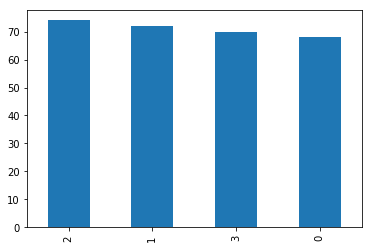

P/E (Diluted, Excl. EI) - Drawing...


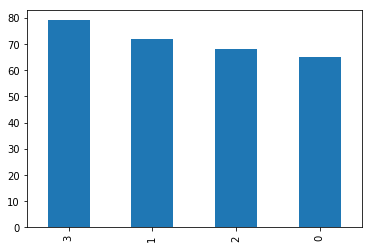

Price/Cash flow - Drawing...


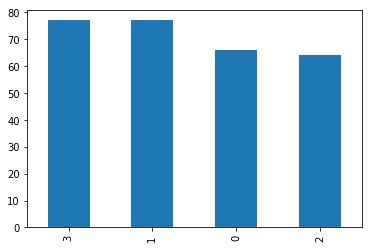

Net Profit Margin - Drawing...


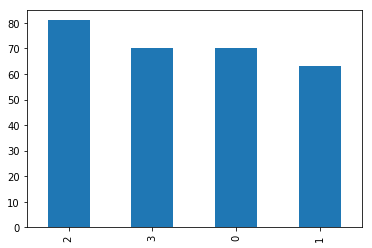

Gross Profit Margin - Drawing...


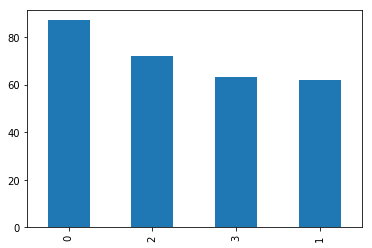

Return on Assets - Drawing...


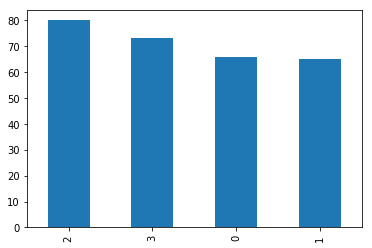

Return on Equity - Drawing...


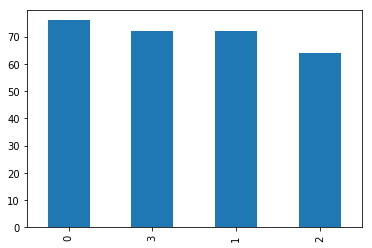

Gross Profit/Total Assets - Drawing...


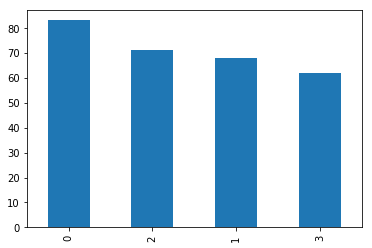

Common Equity/Invested Capital - Drawing...


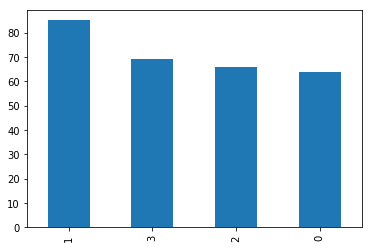

Cash Flow/Total Debt - Drawing...


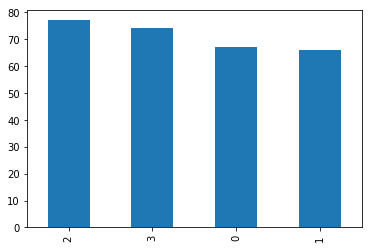

Free Cash Flow/Operating Cash Flow - Drawing...


Total Debt/Total Assets - Drawing...


Total Debt/Capital - Drawing...


Total Debt/Equity - Drawing...


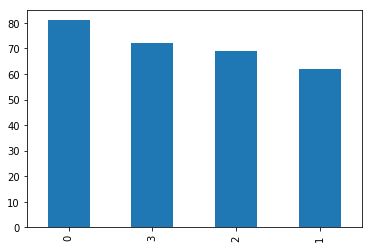

Asset Turnover - Drawing...


Price/Book - Drawing...


MonthlyBeta - Drawing...


MonthlyReturn - Drawing...


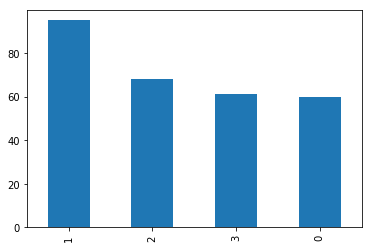

VolatilityWeekly - Drawing...


TradingVolumnWeekly - Drawing...


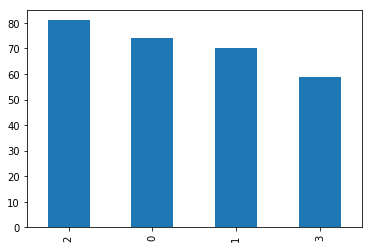

In [9]:
import pickle
data = pickle.load( open( "data.pickle", "rb" ) )
features_pre = pickle.load( open( "features_first.pickle", "rb" ) )

for ele in data:
    print(ele + " - Drawing...")
    features_pre[ele].value_counts().plot('bar')
    import matplotlib.pyplot as plt
    plt.show()